In [ ]:
pip install d2l

     |████████████████████████████████| 83 kB 1.7 MB/s 


AlexNet

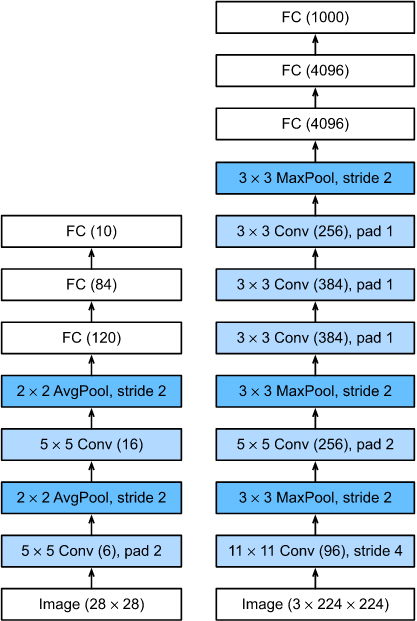

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size = 11, stride = 4, padding = 1), nn.ReLU(),
    nn.MaxPool2d(kernel_size = 3, stride = 2),
    nn.Conv2d(96, 256, kernel_size = 5, padding = 2), nn.ReLU(),
    nn.MaxPool2d(kernel_size = 3, stride = 2),
    nn.Conv2d(256, 384, kernel_size = 3, padding = 1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size = 3, padding = 1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size = 3, padding = 1), nn.ReLU(),
    nn.MaxPool2d(kernel_size = 3, stride = 2), nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(), nn.Dropout(p = 0.5),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p = 0.5),
    nn.Linear(4096, 10)
)

In [ ]:
X = torch.randn(1,1,224,224)
for layer in net:
  X = layer(X)
  print(layer.__class__.__name__, 'OutPut shape:\t', X.shape)

Conv2d OutPut shape:	 torch.Size([1, 96, 54, 54])
ReLU OutPut shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d OutPut shape:	 torch.Size([1, 96, 26, 26])
Conv2d OutPut shape:	 torch.Size([1, 256, 26, 26])
ReLU OutPut shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d OutPut shape:	 torch.Size([1, 256, 12, 12])
Conv2d OutPut shape:	 torch.Size([1, 384, 12, 12])
ReLU OutPut shape:	 torch.Size([1, 384, 12, 12])
Conv2d OutPut shape:	 torch.Size([1, 384, 12, 12])
ReLU OutPut shape:	 torch.Size([1, 384, 12, 12])
Conv2d OutPut shape:	 torch.Size([1, 256, 12, 12])
ReLU OutPut shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d OutPut shape:	 torch.Size([1, 256, 5, 5])
Flatten OutPut shape:	 torch.Size([1, 6400])
Linear OutPut shape:	 torch.Size([1, 4096])
ReLU OutPut shape:	 torch.Size([1, 4096])
Dropout OutPut shape:	 torch.Size([1, 4096])
Linear OutPut shape:	 torch.Size([1, 4096])
ReLU OutPut shape:	 torch.Size([1, 4096])
Dropout OutPut shape:	 torch.Size([1, 4096])
Linear OutPut shape:	 torch.Size([1,

In [ ]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize = 224)


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw




Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw




Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw




Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

loss 0.329, train acc 0.879, test acc 0.879
1433.4 examples/sec on cuda:0


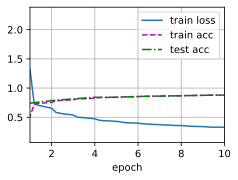

In [ ]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

VGG

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
#VGG块
def vgg_block(num_convs, in_channels, out_channels):
  layers = []
  for _ in range(num_convs):
    layers.append(
        nn.Conv2d(in_channels, out_channels, kernel_size = 3, padding = 1))
    layers.append(nn.ReLU())
    in_channels = out_channels
  layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2))
  return nn.Sequential(*layers)

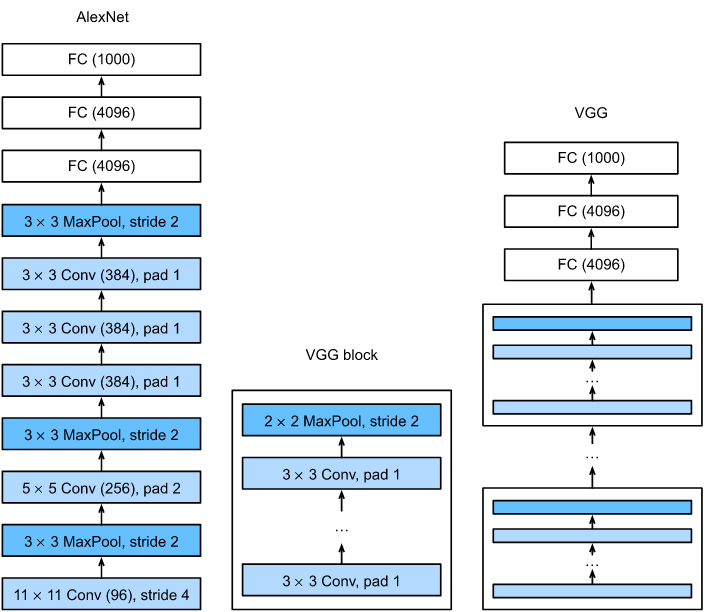

In [ ]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
def vgg(conv_arch):
  conv_blks = []
  in_channels = 1
  for(num_convs, out_channels) in conv_arch:
    conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
    in_channels = out_channels
  return nn.Sequential(*conv_blks, nn.Flatten(),
              nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(),
              nn.Dropout(0.5), nn.Linear(4096, 4096), nn.ReLU(),
              nn.Dropout(0.5), nn.Linear(4096, 10))
net = vgg(conv_arch)

In [ ]:
X = torch.randn(size = (1, 1, 224, 224))
for layer in net:
  X = layer(X)
  print(layer.__class__.__name__, 'output shape:\t', X.shape)


Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


loss 0.177, train acc 0.934, test acc 0.918
661.0 examples/sec on cuda:0


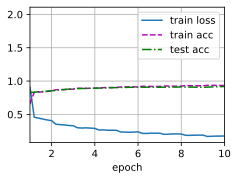

In [ ]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize = 224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

NiN

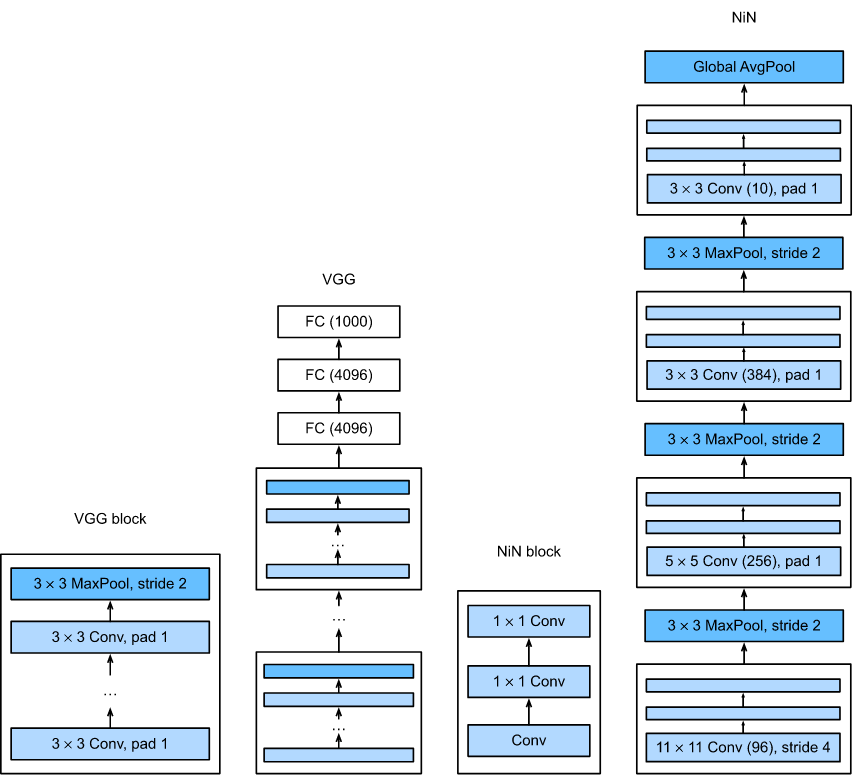

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
def nin_block(in_channels, out_channels, kernel_size, strides, padding):
  return nn.Sequential(
      nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
      nn.ReLU(), nn.Conv2d(out_channels, out_channels, kernel_size = 1),
      nn.ReLU(), nn.Conv2d(out_channels, out_channels, kernel_size = 1),
      nn.ReLU()
  )

In [ ]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size = 11, strides = 4, padding = 0),
    nn.MaxPool2d(3, stride = 2),
    nin_block(96, 256, kernel_size = 5, strides = 1, padding = 2),
    nn.MaxPool2d(3, stride = 2),
    nin_block(256, 384, kernel_size = 3, strides = 1, padding = 1),
    nn.MaxPool2d(3, stride = 2), nn.Dropout(0.5),
    nin_block(384, 10, kernel_size = 3, strides = 1, padding = 1),
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten()
)

In [ ]:
X = torch.randn(size = (1, 1, 224, 224))
for layer in net:
  X = layer(X)
  print(layer.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


loss 0.766, train acc 0.719, test acc 0.728
1033.7 examples/sec on cuda:0


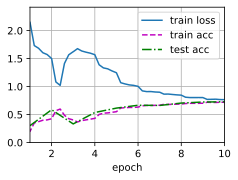

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize = 224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

GoogLeNet

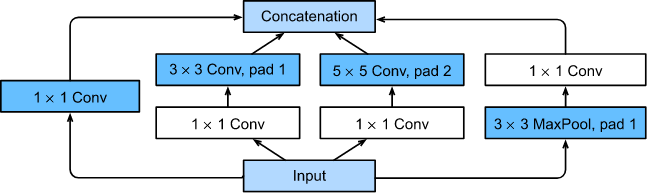
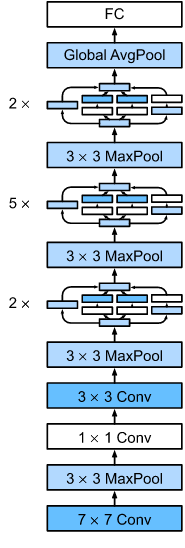

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l
#Inception 块
class Inception(nn.Module):
  def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
    super(Inception, self).__init__(**kwargs)
    self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size = 1)
    self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size = 1)
    self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size = 3, padding = 1)
    self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size = 1)
    self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size = 5, padding = 2)
    self.p4_1 = nn.MaxPool2d(kernel_size = 3, stride = 1, padding = 1)
    self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size = 1)
  def forward(self, x):
    p1 = F.relu(self.p1_1(x))
    p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
    p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
    p4 = F.relu(self.p4_2(self.p4_1(x)))
    return torch.cat((p1, p2, p3, p4), dim = 1)


In [ ]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size = 7, stride = 2, padding = 3),
          nn.ReLU(), nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1))
b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size = 1), nn.ReLU(),
                   nn.Conv2d(64, 192, kernel_size = 3, padding = 1),
                   nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1))
b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
          Inception(256, 128, (128, 192), (32, 96), 64),
          nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1))
b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
          Inception(512, 160, (112, 224), (24, 64), 64),
          Inception(512, 128, (128, 256), (24, 64), 64),
          Inception(512, 112, (144, 288), (32, 64), 64),
          Inception(528, 256, (160, 320), (32, 128), 128),
          nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1))
b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
          Inception(832, 384, (192, 384), (48, 128), 128),
          nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten())
net = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 10))

In [ ]:
X = torch.randn(size = (1, 1, 96, 96))
for layer in net:
  X = layer(X)
  print(layer.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


loss 0.243, train acc 0.908, test acc 0.891
1421.5 examples/sec on cuda:0


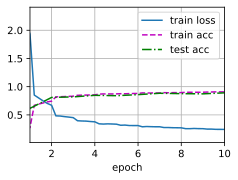

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize = 96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

批量归一化

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
#批量归一化层实现
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
  if not torch.is_grad_enabled():
    X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
  else:
    assert len(X.shape) in (2, 4)
    if len(X.shape) == 2:
      mean = X.mean(dim = 0)
      var = ((X - mean)**2).mean(dim = 0)
    else:
      mean = X.mean(dim = (0, 2, 3), keepdim = True)
      var = ((X - mean)**2).mean(dim = (0, 2, 3), keepdim = True)
    x_hat = (X - mean) / torch.sqrt(var + eps)
    moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
    moving_var = momentum * moving_var + (1.0 - momentum) * var
  Y = gamma * X_hat + beta
  return Y, moving_mean.data, moving_var.data
class BatchNorm(nn.Module):
  def __init__(self, num_features, num_dims):
    super().__init__()
    if num_dims == 2:
      shape = (1, num_features)
    else:
      shape = (1, num_features, 1, 1)
    self.gamma = nn.Parameter(torch.ones(shape))
    self.beta = nn.Parameter(torch.zeros(shape))
    self.moving_mean = torch.zeros(shape)
    self.moving_var = torch.ones(shape)
  def forward(self, X):
    if self.moving_mean.dvice != X.device:
      self.moving_mean = self.moving_mean.to(X.device)
      self.moving_var = self.moving_var.to(X.device)
    Y, self.moving_mean, self.moving_var = batch_norm(
        X, self.gamma, self.beta, self.moving_mean, self.moving_var,
        eps = 1e-5, momentum = 0.9
    )
    return Y

In [ ]:
net = nn.Sequential(nn.Conv2d(1, 6, kernel_size = 5), nn.BatchNorm2d(6),
           nn.Sigmoid(), nn.MaxPool2d(kernel_size = 2, stride = 2),
           nn.Conv2d(6, 16, kernel_size = 5), nn.BatchNorm2d(16),
           nn.Sigmoid(), nn.MaxPool2d(kernel_size = 2, stride = 2),
           nn.Flatten(), nn.Linear(256, 120), nn.BatchNorm1d(120),
           nn.Sigmoid(), nn.Linear(120, 84), nn.BatchNorm1d(84),
           nn.Sigmoid(), nn.Linear(84, 10))

loss 0.250, train acc 0.908, test acc 0.868
37300.1 examples/sec on cuda:0


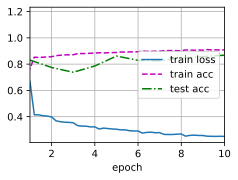

In [ ]:
lr, num_epochs, batch_size = 1.0, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

残差神经网络

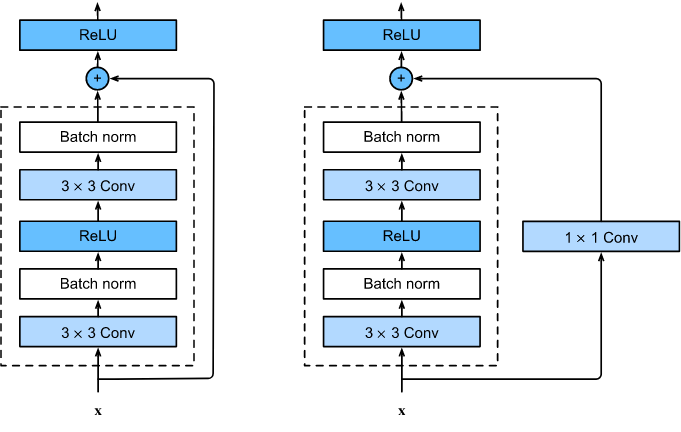

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l
#残差块
class Residual(nn.Module):
  def __init__(self, input_channels, num_channels, use_1x1conv = False, strides = 1):
    super().__init__()
    self.conv1 = nn.Conv2d(input_channels, num_channels, kernel_size = 3, padding = 1, stride = strides)
    self.conv2 = nn.Conv2d(num_channels, num_channels, kernel_size = 3, padding = 1)
    if use_1x1conv:
      self.conv3 = nn.Conv2d(input_channels, num_channels, kernel_size = 1, stride = strides)
    else:
      self.conv3 = None
    self.bn1 = nn.BatchNorm2d(num_channels)
    self.bn2 = nn.BatchNorm2d(num_channels)
    self.relu = nn.ReLU(inplace = True)
  def forward(self, X):
    Y = F.relu(self.bn1(self.conv1(X)))
    Y = self.bn2(self.conv2(Y))
    if self.conv3:
      X = self.conv3(X)
    Y += X
    return F.relu(Y)

In [ ]:
#ResNet 模型
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size = 7, stride = 2, padding = 3),
          nn.BatchNorm2d(64), nn.ReLU(),
          nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1))
def resnet_block(input_channels, num_channels, num_residuals, first_block = False):
  blk = []
  for i in range(num_residuals):
    if i == 0 and not first_block:
      blk.append(Residual(input_channels, num_channels, use_1x1conv = True, strides = 2)
      )
    else:
      blk.append(Residual(num_channels, num_channels))
  return blk
b2 = nn.Sequential(*resnet_block(64, 64, 2, first_block = True))
b3 = nn.Sequential(*resnet_block(64, 128, 2))
b4 = nn.Sequential(*resnet_block(128, 256, 2))
b5 = nn.Sequential(*resnet_block(256, 512, 2))
net = nn.Sequential(b1, b2, b3, b4, b5, nn.AdaptiveAvgPool2d((1, 1)),
                    nn.Flatten(), nn.Linear(512, 10))
X = torch.randn(size = (1, 1, 224, 224))
for layer in net:
  X = layer(X)
  print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 128, 28, 28])
Sequential output shape:	 torch.Size([1, 256, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 512, 1, 1])
Flatten output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 10])


loss 0.016, train acc 0.996, test acc 0.911
1391.0 examples/sec on cuda:0


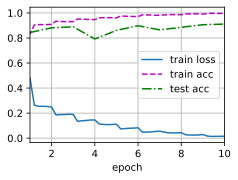

In [ ]:
lr, num_epochs, batch_size = 0.05, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize = 96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

DenseNet

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
#新型卷积块
def conv_block(input_channels, num_channels):
  return nn.Sequential(
      nn.BatchNorm2d(input_channels), nn.ReLU(),
      nn.Conv2d(input_channels, num_channels, kernel_size = 3, padding = 1)
  )

In [ ]:
#稠密块
class DenseBlock(nn.Module):
  def __init__(self, num_convs, input_channels, num_channels):
    super(DenseBlock, self).__init__()
    layer = []
    for i in range(num_convs):
      layer.append(
          conv_block(num_channels * i + input_channels, num_channels)
      )
    self.net = nn.Sequential(*layer)
  def forward(self, X):
    for blk in self.net:
      Y = blk(X)
      X = torch.cat((X, Y), dim = 1)
    return X

In [ ]:
#过渡层
def transition_block(input_channels, num_channels):
  return nn.Sequential(
      nn.BatchNorm2d(input_channels), nn.ReLU(),
      nn.Conv2d(input_channels, num_channels, kernel_size = 1),
      nn.AvgPool2d(kernel_size = 2, stride = 2)
  )

In [ ]:
#Densenet
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size = 7, stride = 2, padding = 3),
                   nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1))
num_channels, growth_rate = 64, 32
num_convs_in_dense_blocks = [4, 4, 4, 4]
blks = []
for i, num_convs in enumerate(num_convs_in_dense_blocks):
  blks.append(DenseBlock(num_convs, num_channels, growth_rate))
  num_channels += num_convs * growth_rate
  if i != len(num_convs_in_dense_blocks) - 1:
    blks.append(transition_block(num_channels, num_channels //2))
    num_channels = num_channels //2
net = nn.Sequential(b1, *blks, nn.BatchNorm2d(num_channels), nn.ReLU(),
           nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
           nn.Linear(num_channels, 10))

loss 0.140, train acc 0.948, test acc 0.887
1875.0 examples/sec on cuda:0


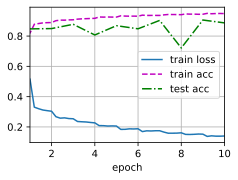

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize = 96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())